0.9479981723476849

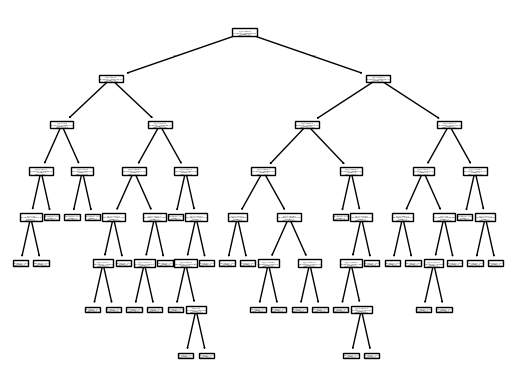

In [5]:
#data collection
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")

#standardistion
dataset=pd.get_dummies(dataset,drop_first=True).astype(int)

#input output split
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dependent=dataset[["Profit"]]

#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

#Model create
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
#hyper tuning parameter
#regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
#criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
#splitter{“best”, “random”}, default=”best”
#max_depth int, default=None
regressor=DecisionTreeRegressor(criterion='squared_error',splitter="random",max_depth=None)
regressor=regressor.fit(X_train,y_train)

import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

#metrics 
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

In [6]:
r_score

0.9479981723476849

In [8]:
#save model
import pickle
filename="finalized_Decision_Tree_Model.sav"
pickle.dump(regressor,open(filename,'wb'))

#load Model
loaded_model=pickle.load(open("finalized_Decision_Tree_Model.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])
result

C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([49490.])